In [1]:
#import required libraries and model 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
#read csv file of salary dataframe
df=pd.read_csv('Salary.csv')

In [3]:
#read first five entries  of dataframe
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
#to check how many rows and columns are present in dataframe,here 35 rows amd 2 column are present
df.shape

(35, 2)

In [5]:
#to check which column are present 
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
#to shows a summary of dataframe , In this there is 35 entries i.e 0 - 34 with 0 null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
YearsExperience    35 non-null float64
Salary             35 non-null int64
dtypes: float64(1), int64(1)
memory usage: 640.0 bytes


In [7]:
#The describe() function computes a summary of statistics for numeric entries
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [95]:
#corr() function shows the correlation between columns having numberic value, correlation range is between -1 to +1.
#In given data set it is show that Years of Experience is highly correlated with salary 
df.corr()

,YearsExperience,Salary,Cluster
YearsExperience,1.000000,0.982427,-0.106029
Salary,0.982427,1.000000,-0.062091
Cluster,-0.106029,-0.062091,1.000000


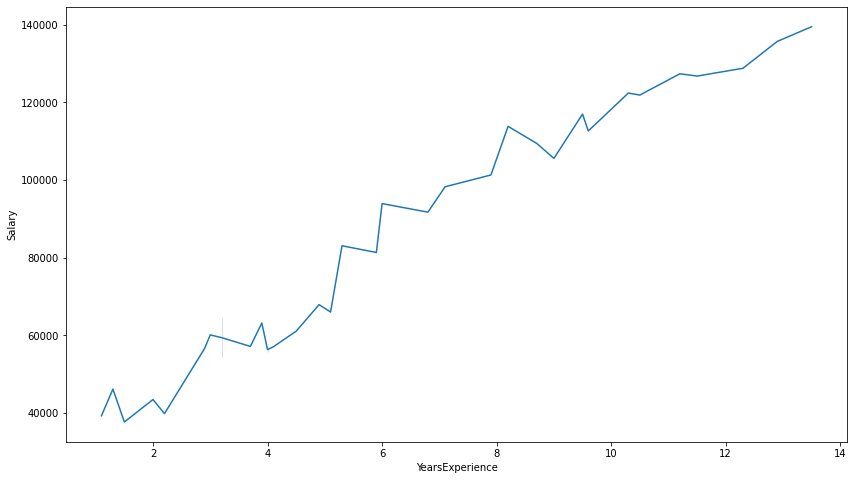

In [9]:
#these line plot shows that if you have more year of experience then you have more salary
plt.figure(figsize=(14,8))
sns.lineplot(df['YearsExperience'],df['Salary'])

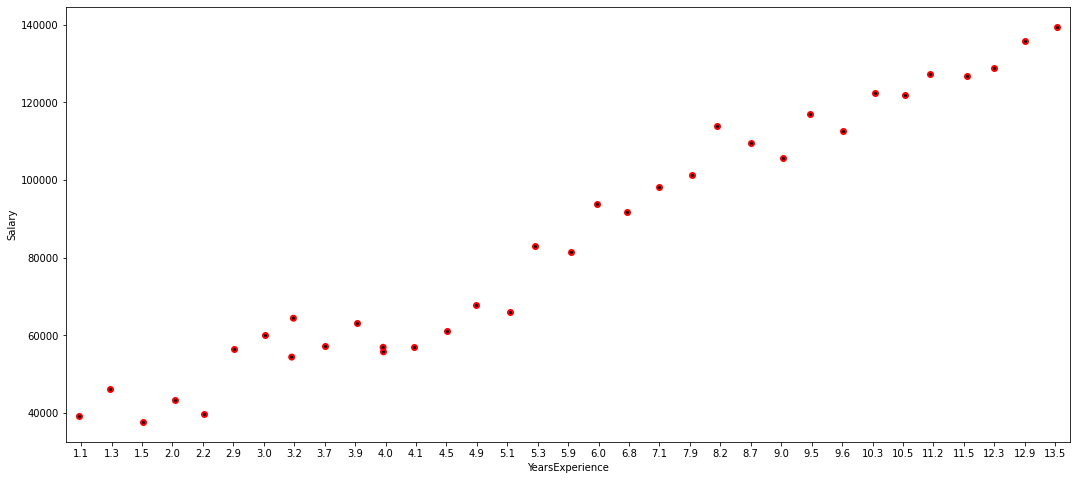

In [10]:
#stripplot also shows that years of experience is directly propositional to salary
plt.figure(figsize=(18,8))
sns.stripplot(df['YearsExperience'],df['Salary'],color='black',linewidth=2,edgecolor='red')

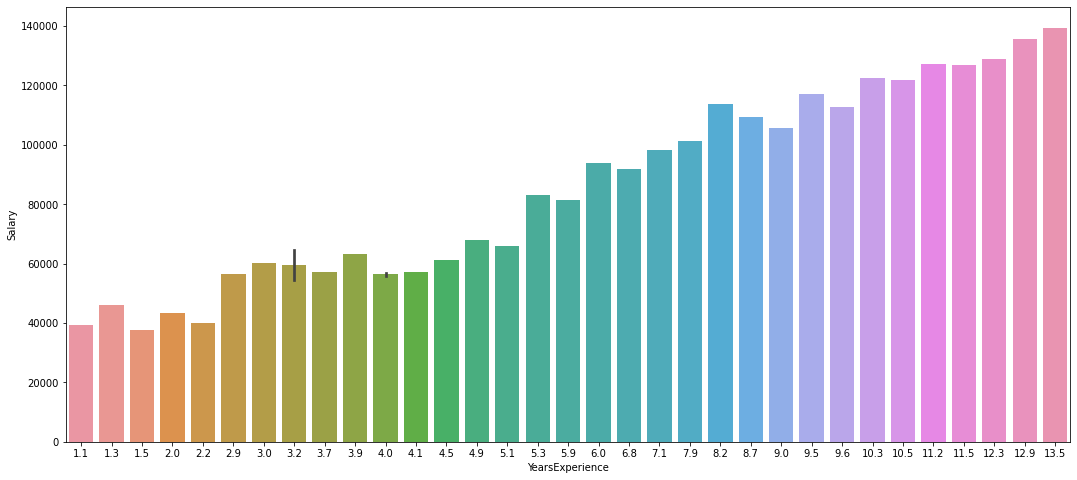

In [11]:
#these barplot shows that if you have more year of experience then you have more salary
plt.figure(figsize=(18,8))
sns.barplot(df['YearsExperience'],df['Salary'])

In [13]:
#Number of clusters form it means how many group you want to create
KM = KMeans(n_clusters=4)
Y_predict=KM.fit_predict(df[['YearsExperience','Salary']])
Y_predict

array([3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
#add column 'Cluster' having values of y_predict in given dataframe
df['Cluster']=Y_predict

In [17]:
#show dataframe first five entries after adding "Cluster" column
df.head()

,YearsExperience,Salary,Cluster
0,1.1,39343,3
1,1.3,46205,3
2,1.5,37731,3
3,2.0,43525,3
4,2.2,39891,3


In [18]:
#it shows the X and Y coordinates of centroid
KM.cluster_centers_

array([[3.87500000e+00, 6.00832500e+04],
       [1.07454545e+01, 1.23192364e+05],
       [6.85714286e+00, 9.36122857e+04],
       [1.62000000e+00, 4.13390000e+04]])

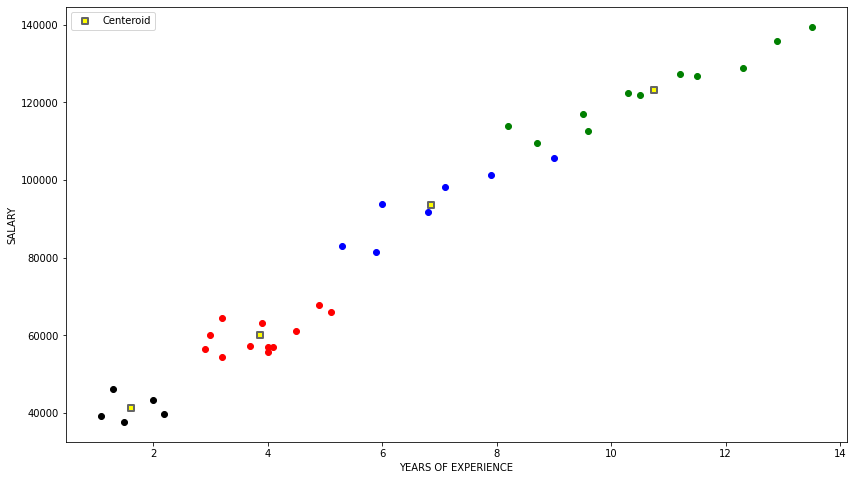

In [39]:
plt.figure(figsize=(14,8))

df0=df[df.Cluster==0]         #Create new dataframe having Cluster values equal to '0'
df1=df[df.Cluster==1]         #Create new dataframe having Cluster values equal to '1'
df2=df[df.Cluster==2]         #Create new dataframe having Cluster values equal to '2'
df3=df[df.Cluster==3]         #Create new dataframe having Cluster values equal to '3'


plt.scatter(df0['YearsExperience'],df0['Salary'],color='red')    #scatter plot where cluster = 0
plt.scatter(df1['YearsExperience'],df1['Salary'],color='green')  #scatter plot where cluster = 1
plt.scatter(df2['YearsExperience'],df2['Salary'],color='blue')   #scatter plot where cluster = 2
plt.scatter(df3['YearsExperience'],df3['Salary'],color='black')  #scatter plot where cluster = 3


plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],color='yellow',marker='s',edgecolors='#666666',linewidths=2,label='Centeroid')
#In below graph there is four yellow box having border color gray is a centroid of clusters

plt.xlabel("YEARS OF EXPERIENCE") #It's a X-axis label
plt.ylabel("SALARY") #It's a Y-axis label
plt.legend()

In [43]:
#train model for target data and perform a scaler transform aslo transform data in to original column 
Scaler = MinMaxScaler()

Scaler.fit(df[['YearsExperience']])
df['YearsExperience']=Scaler.transform(df[['YearsExperience']])

Scaler.fit(df[['Salary']])
df['Salary']=Scaler.transform(df[['Salary']])

In [45]:
# It shows the data after preprocessing ,We can see that all the values of YearsExperience and salary now are between 0 to 1 .
df.head()

,YearsExperience,Salary,Cluster
0,0.000000,0.015845,3
1,0.016129,0.083296,3
2,0.032258,0.000000,3
3,0.072581,0.056952,3
4,0.088710,0.021232,3


In [47]:
#now using SSE (Sum of Squared errors) we can find best number of clusters for given dataframe
SSE=[]
K_M=list(range(1,15))
for K in K_M:
    KM=KMeans(n_clusters=K)
    KM.fit_predict(df[['YearsExperience','Salary']])
    SSE.append(KM.inertia_)
print(SSE)

[6.293685484541874, 1.2926909191418863, 0.6527227565513627, 0.4101141952961812, 0.21368181551259902, 0.15226682764323599, 0.11893295329188819, 0.0884933811750721, 0.07539867796407222, 0.063571206895111, 0.05172479497947771, 0.04183532681366172, 0.03918147661664039, 0.03308868703327784]


Text(0, 0.5, 'S S E')

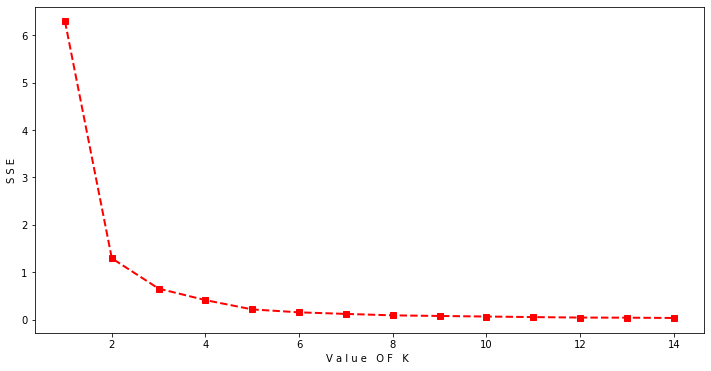

In [60]:
#for decide the best value of cluster we plot a graph between K_M and SSE 
#and see at which point our plot bent like elbow and this point is out best value of Cluster 
plt.figure(figsize=(12,6))
plt.plot(K_M,SSE,'rs--',linewidth=2, markersize=6)
plt.xlabel("V a l u e   O F   K ")    #It's a X-axis label
plt.ylabel("S S E")                   #It's a Y-axis label

###### As we discuss above and plot, we can say that 2 is a perfect value for clusreing for this dataframe because at value K = 2 point our plot bent like elbow therefore this point is out best value of Cluster
##### Below plot  also shows the best value of K is 2 .

Text(0, 0.5, 'S S E')

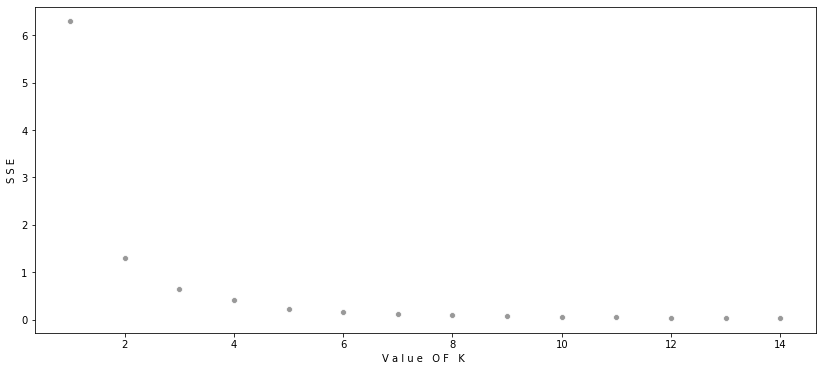

In [70]:
plt.figure(figsize=(14,6))
sns.scatterplot(K_M,SSE,color='#999999')
plt.xlabel("V a l u e   O F   K ")    #It's a X-axis label
plt.ylabel("S S E")                   #It's a Y-axis label

Text(0, 0.5, 'S S E')

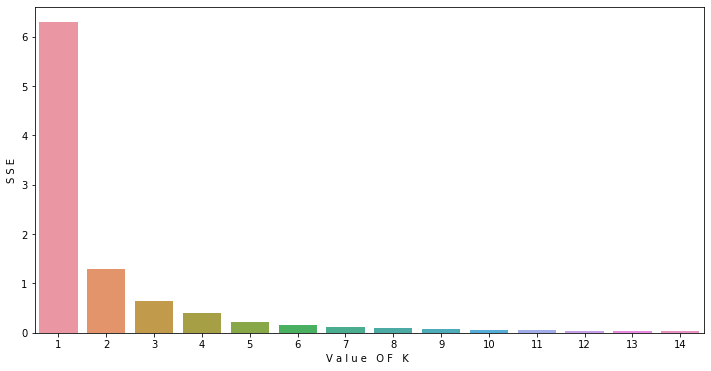

In [72]:
plt.figure(figsize=(12,6))
sns.barplot(K_M,SSE)
plt.xlabel("V a l u e   O F   K ")    #It's a X-axis label
plt.ylabel("S S E")                   #It's a Y-axis label

Text(0, 0.5, 'S S E')

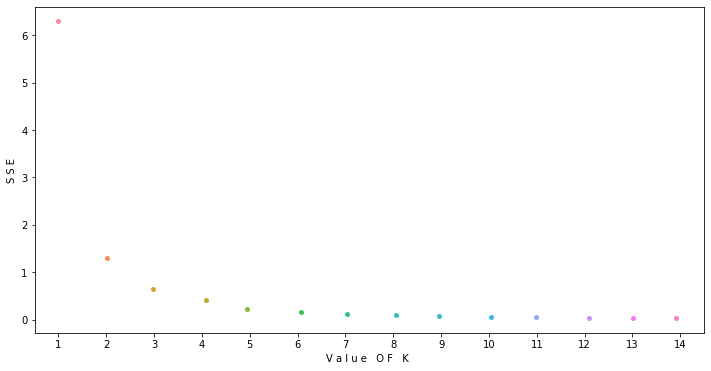

In [77]:
plt.figure(figsize=(12,6))
sns.stripplot(K_M,SSE)
plt.xlabel("V a l u e   O F   K ")    #It's a X-axis label
plt.ylabel("S S E")                   #It's a Y-axis label

Text(0, 0.5, 'S S E')

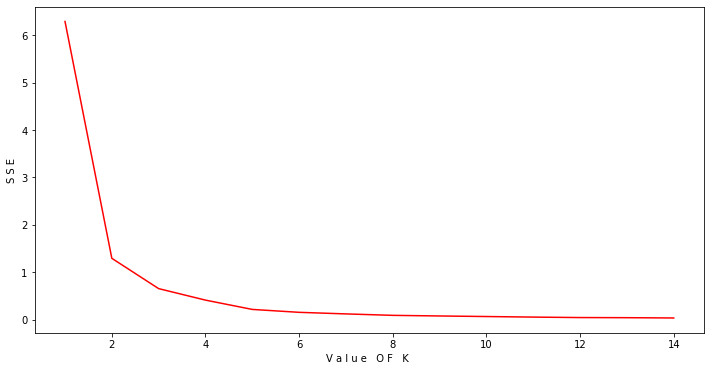

In [84]:
plt.figure(figsize=(12,6))
sns.lineplot(K_M,SSE,color='red')
plt.xlabel("V a l u e   O F   K ")    #It's a X-axis label
plt.ylabel("S S E")                   #It's a Y-axis label

Text(336.9714285714286, 0.5, 'S S E')

<Figure size 864x432 with 0 Axes>

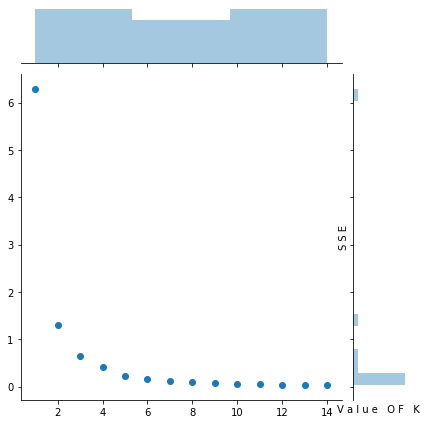

In [86]:
plt.figure(figsize=(12,6))
sns.jointplot(K_M,SSE)
plt.xlabel("V a l u e   O F   K ")    #It's a X-axis label
plt.ylabel("S S E")                   #It's a Y-axis label

From above each plot we can say that 2 is a perfect value for clusreing for this dataframe because at value K = 2 our plot bent like elbow therefore this point is out best value of Cluster.